# Data Exploration for CTSlice dataset

In [3]:
import numpy as np
import pandas as pd
import os

from torchvision.datasets.utils import download_url, download_and_extract_archive
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## `CTSlice` from `SSDKL`

In [4]:
def load_dataset_from_ssdkl(path_to_folder):
    X = np.load(os.path.join(path_to_folder, "X.npy"))
    y = np.load(os.path.join(path_to_folder, "y.npy"))

    return X, y

PATH_TO_DATASET = "/home/flo/ssdgm/notebooks/datasets/SSDKL/ctslice"
X_ssdkl, y_ssdkl = load_dataset_from_ssdkl(PATH_TO_DATASET)
X_ssdkl.shape, y_ssdkl.shape

((53500, 384), (53500,))

## `CTSlice` from `UCI`

In [5]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00206/slice_localization_data.zip"
DOWNLOAD_FOLDER = "/home/flo/ssdgm/notebooks/datasets/UCI/CTSlice/raw"

download_and_extract_archive(url=URL, download_root=DOWNLOAD_FOLDER)
os.remove(os.path.join(DOWNLOAD_FOLDER, os.path.basename(URL)))

Using downloaded and verified file: /home/flo/ssdgm/notebooks/datasets/UCI/CTSlice/raw/slice_localization_data.zip
Extracting /home/flo/ssdgm/notebooks/datasets/UCI/CTSlice/raw/slice_localization_data.zip to /home/flo/ssdgm/notebooks/datasets/UCI/CTSlice/raw


BadZipFile: File is not a zip file

In [6]:
df_uci = pd.read_csv(os.path.join(DOWNLOAD_FOLDER, "slice_localization_data.csv"))
df_uci.shape

(53500, 386)

In [7]:
df_uci.head()

,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.980381,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.803851
1,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.745726
2,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.687600
3,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.629474
4,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.976833,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.571348


## Necessary Cleaning Steps

In [8]:
df_uci.describe()

,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
count,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,...,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000
mean,47.075701,0.059627,0.071558,0.145819,0.218728,0.274762,0.276189,0.204531,0.062281,-0.042025,...,-0.029404,0.182913,0.320112,0.359373,0.342889,0.266091,0.083049,-0.031146,-0.154524,47.028039
std,27.414240,0.174243,0.196921,0.300270,0.359163,0.378862,0.369605,0.351294,0.292232,0.268391,...,0.085817,0.383333,0.463517,0.478188,0.471811,0.437633,0.279734,0.098738,0.122491,22.347042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,-0.250000,...,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,1.738733
25%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,29.891607
50%,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,43.987893
75%,70.000000,0.000000,0.000000,0.000000,0.446429,0.684477,0.662382,0.441412,0.000000,0.000000,...,0.000000,0.000000,0.996286,0.999677,0.999560,0.949478,0.000000,0.000000,0.000000,63.735059
max,96.000000,1.000000,1.000000,1.000000,1.000000,0.998790,0.996468,0.999334,1.000000,1.000000,...,0.961279,1.000000,1.000000,1.000000,1.000000,1.000000,0.999857,0.996839,0.942851,97.489115


- Remove Id column

In [9]:
df_uci = df_uci.drop(['patientId'], axis=1)

In [10]:
for col in df_uci.columns:
    if (df_uci[col] == 0.0).all():
        print(f"{col} is all zero.")
    if (df_uci[col].std() == 0.0):
        print(f"{col} has only one value: {df_uci[col].unique()}")

value59 has only one value: [-0.25]
value69 has only one value: [-0.25]
value179 has only one value: [-0.25]
value189 has only one value: [-0.25]
value351 has only one value: [-0.25]


0       -0.250000
1       -0.250000
2       -0.250000
3       -0.250000
4       -0.250000
           ...   
53495    0.952227
53496    0.938813
53497    0.938813
53498   -0.250000
53499   -0.250000
Name: value7, Length: 53500, dtype: float64

In [24]:
df_uci_cleaned = df_uci.drop(["value59", "value69", "value179", "value189", "value351"], axis=1)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df_uci_cleaned.iloc[:, :-1]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

/home/flo/miniconda3/envs/ssdgm/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


      feature         VIF
0      value0    5.257894
1      value1    3.280922
2      value2    4.682348
3      value3    5.288112
4      value4    5.022958
..        ...         ...
374  value379   14.956506
375  value380    9.349961
376  value381    5.349642
377  value382    6.307912
378  value383  177.111164

[379 rows x 2 columns]


In [26]:
print("Unique values:\n", vif_data["VIF"].value_counts().sort_index(ascending=False))
print("\nMean: ", np.mean(vif_data[vif_data["VIF"] != np.inf]["VIF"]))
print("\nMedian: ", np.median(vif_data[vif_data["VIF"] != np.inf]["VIF"]))

Unique values:
 inf            12
5475.973790     1
5415.941556     1
2644.413920     1
1402.451543     1
               ..
1.930128        1
1.864486        1
1.663351        1
1.639341        1
1.611446        1
Name: VIF, Length: 368, dtype: int64

Mean:  71.32932141642212

Median:  5.109830319509718


<AxesSubplot:>

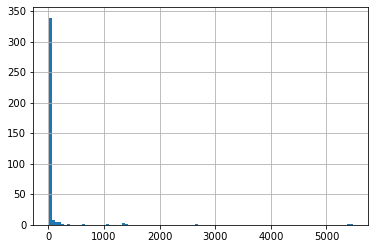

In [34]:
vif_data[vif_data["VIF"] != np.inf]["VIF"].hist(bins=100)

In [27]:
for i in range(5, 100, 5):
    print(f"{i}: ", np.sum(vif_data["VIF"] > i))

5:  204
10:  94
15:  75
20:  61
25:  56
30:  50
35:  49
40:  47
45:  45
50:  43
55:  40
60:  39
65:  39
70:  38
75:  37
80:  36
85:  36
90:  36
95:  36


In [28]:
np.linalg.cond(X)

1.1007234188819889e+18

In [24]:
for el in df_uci.min():
    print(el)

0.0
0.0
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
-0.25
-0.25
-0.25
-0.25
-0.25
-0.25
-0.25
0.0
0.0
0.0
-0.25
-0.25
-0

## Conclusion

- use `reference` as target variable